* 2007 - 2021 여가정책 만족도를 파악해서, 년도별 어떤 정책이 가장 중요했고, 중요하지 않았는지 트렌드 파악.
 

*여가 정책 중요도 - 공휴일과 휴가를 법적 보장 
중요도를 범주로 바꾸로 각각 뽑아서 
중요도 순위별 라인그래프를 겹쳐서 그리기.


In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd
import numpy as np #통계분포 numpy
import matplotlib.pyplot as plt #데이터 시각화 
%matplotlib inline
import seaborn as sns  #데이터 시각화 
from sklearn import preprocessing
sns.set()

In [92]:
df = pd.read_csv("/content/ex1.csv", encoding='cp949')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,102,111,120,129,138,144,145,150,154,155,156,157,159,160,162,163,165,166,168,169,171,172,174,175,177,178,179,180,181,183,184,186,187,189,190,192,193,195,196,198,199,201,206,207,228,229,230,231,232,233,234,235,236,258,271,272,273,274,275,276,277,278,279,280,288,289,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,314,315,316,317,318,319,320,321,322,323,324,325,326,327,329,330,331,332,333,347,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,387,389,390,392,396,397,398,399,400,401,402,403,404,405,406,408,481,482,4

,Unnamed: 0,ID,year,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,...,UM_2014_v29,UM_2014_v30,UM_2014_v31,UM_2016_Q21A1,UM_2016_Q21A2,UM_2016_Q21A3,UM_2016_Q38A1,UM_2016_Q38A2,UM_2016_Q38A3,UM_2018_Q39A3
0,1,1,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 한글폰트

In [93]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc

In [94]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = "‪C:/Users/37711/Downloads/nanum-gothic/NanumGothic.otf"
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

## 변수 이름지정

In [ ]:
policy_df=df[['ID','year','Q26_1', 'Q26_2','Q26_3','Q26_4','Q26_5','Q26_6','Q26_7','Q26_1_1','Q26_1_2','Q26_1_3','Q27_1','Q27_2','Q27_3','Q27_4','Q27_5','Q27_6','Q27_7']]
policy_df

In [96]:
policy_df.rename(columns={'Q26_1':'여가시설의 다양성','Q26_2':'질 좋은 여가프로그램 개발 및 보급','Q26_3':'여가 관련 전문인력 양성 및 배치','Q26_4':'여가관련 동호회 육성 및 지원','Q26_5':'소외계층 여가생활 지원','Q26_6':'여가관련 법규와 제도 개선','Q26_7':'공휴일과 휴가를 법적 보장','Q26_1_1':'여가 정책 중요도 순위 (1순위)','Q26_1_2':'여가 정책 중요도 순위 (2순위)','Q26_1_3':'여가 정책 중요도 순위 (3순위)','Q27_1':'여가시설의 다양성','Q27_2':'질 좋은 여가프로그램 개발 및 보급','Q27_3':'여가 관련 전문인력 양성 및 배치','Q27_4':'여가관련 동호회 육성 및 지원','Q27_5':'소외계층 여가생활 지원','Q27_6':'여가관련 법규와 제도 개선','Q27_7':'공휴일과 휴가를 법적 보장'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 데이터확인

In [123]:
policy_df

,ID,year,여가시설의 다양성,질 좋은 여가프로그램 개발 및 보급,여가 관련 전문인력 양성 및 배치,여가관련 동호회 육성 및 지원,소외계층 여가생활 지원,여가관련 법규와 제도 개선,공휴일과 휴가를 법적 보장,여가 정책 중요도 순위 (1순위),여가 정책 중요도 순위 (2순위),여가 정책 중요도 순위 (3순위),여가시설의 다양성,질 좋은 여가프로그램 개발 및 보급,여가 관련 전문인력 양성 및 배치,여가관련 동호회 육성 및 지원,소외계층 여가생활 지원,여가관련 법규와 제도 개선,공휴일과 휴가를 법적 보장
0,1,2014,7 매우 중요하다,4 보통이다,3,7 매우 중요하다,7 매우 중요하다,3,7 매우 중요하다,소외계층을 위한 여가생활을 지원,다양한 여가시설,공휴일과 휴가를 법적으로 보장,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014,6,5,4 보통이다,3,6,5,5,소외계층을 위한 여가생활을 지원,다양한 여가시설,보다 나은 여가생활을 위해 관련 법규와 제도를 개선,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2014,5,5,5,5,7 매우 중요하다,6,6,질 좋은 여가프로그램을 개발 및 보급,다양한 여가시설,여가와 관련한 전문인력을 양성 및 배치,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2014,6,6,7 매우 중요하다,6,7 매우 중요하다,6,7 매우 중요하다,소외계층을 위한 여가생활을 지원,공휴일과 휴가를 법적으로 보장,여가와 관련한 전문인력을 양성 및 배치,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2014,6,7 매우 중요하다,6,6,7 매우 중요하다,7 매우 중요하다,6,질 좋은 여가프로그램을 개발 및 보급,소외계층을 위한 여가생활을 지원,보다 나은 여가생활을 위해 관련 법규와 제도를 개선,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61326,25065,2021,7 매우 중요하다,7 매우 중요하다,6,6,5,5,5,다양한 여가시설,질 좋은 여가프로그램을 개발 및 보급,소외계층을 위한 여가생활을 지원,6,6,6,4 보통이다,5,5,5
61327,25066,2021,7 매우 중요하다,7 매우 중요하다,6,6,5,6,6,질 좋은 여가프로그램을 개발 및 보급,다양한 여가시설,공휴일과 휴가를 법적으로 보장,6,7 매우 만족한다,5,6,5,5,5
61328,25067,2021,7 매우 중요하다,6,5,6,6,5,6,다양한 여가시설,질 좋은 여가프로그램을 개발 및 보급,공휴일과 휴가를 법적으로 보장,6,6,5,5,4 보통이다,4 보통이다,5
61329,25068,2021,6,7 매우 중요하다,5,5,7 매우 중요하다,6,5,질 좋은 여가프로그램을 개발 및 보급,소외계층을 위한 여가생활을 지원,보다 나은 여가생활을 위해 관련 법규와 제도를 개선,4 보통이다,5,5,4 보통이다,5,5,5


In [97]:
policy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61331 entries, 0 to 61330
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   61331 non-null  int64 
 1   year                 61331 non-null  int64 
 2   여가시설의 다양성            61331 non-null  object
 3   질 좋은 여가프로그램 개발 및 보급  61331 non-null  object
 4   여가 관련 전문인력 양성 및 배치   61331 non-null  object
 5   여가관련 동호회 육성 및 지원     61331 non-null  object
 6   소외계층 여가생활 지원         61331 non-null  object
 7   여가관련 법규와 제도 개선       61331 non-null  object
 8   공휴일과 휴가를 법적 보장       61331 non-null  object
 9   여가 정책 중요도 순위 (1순위)   61331 non-null  object
 10  여가 정책 중요도 순위 (2순위)   61261 non-null  object
 11  여가 정책 중요도 순위 (3순위)   61194 non-null  object
 12  여가시설의 다양성            51297 non-null  object
 13  질 좋은 여가프로그램 개발 및 보급  51297 non-null  object
 14  여가 관련 전문인력 양성 및 배치   51297 non-null  object
 15  여가관련 동호회 육성 및 지원     51297 non-null  object
 16  소외계층

In [98]:
policy_df.isnull().sum()

ID                         0
year                       0
여가시설의 다양성                  0
질 좋은 여가프로그램 개발 및 보급        0
여가 관련 전문인력 양성 및 배치         0
여가관련 동호회 육성 및 지원           0
소외계층 여가생활 지원               0
여가관련 법규와 제도 개선             0
공휴일과 휴가를 법적 보장             0
여가 정책 중요도 순위 (1순위)         0
여가 정책 중요도 순위 (2순위)        70
여가 정책 중요도 순위 (3순위)       137
여가시설의 다양성              10034
질 좋은 여가프로그램 개발 및 보급    10034
여가 관련 전문인력 양성 및 배치     10034
여가관련 동호회 육성 및 지원       10034
소외계층 여가생활 지원           10034
여가관련 법규와 제도 개선         10034
공휴일과 휴가를 법적 보장         10034
dtype: int64

In [99]:
policy_df['여가 정책 중요도 순위 (1순위)'].value_counts()

다양한 여가시설                        22364
질 좋은 여가프로그램을 개발 및 보급            12396
소외계층을 위한 여가생활을 지원                8147
여가와 관련한 전문인력을 양성 및 배치            6142
공휴일과 휴가를 법적으로 보장                 4717
여가관련 동호회를 육성 및 지원                4262
보다 나은 여가생활을 위해 관련 법규와 제도를 개선     3238
무응답                                50
98                                 15
Name: 여가 정책 중요도 순위 (1순위), dtype: int64

## 여가 정책 중요도 순위 (1~3순위)
*가장 중요한 1순위 : 다양한 여가시설,
             2순위 : 질 좋은 여가프로그럄 보급, 
             3순위 : 여가와 관련한 전문이 양성배치

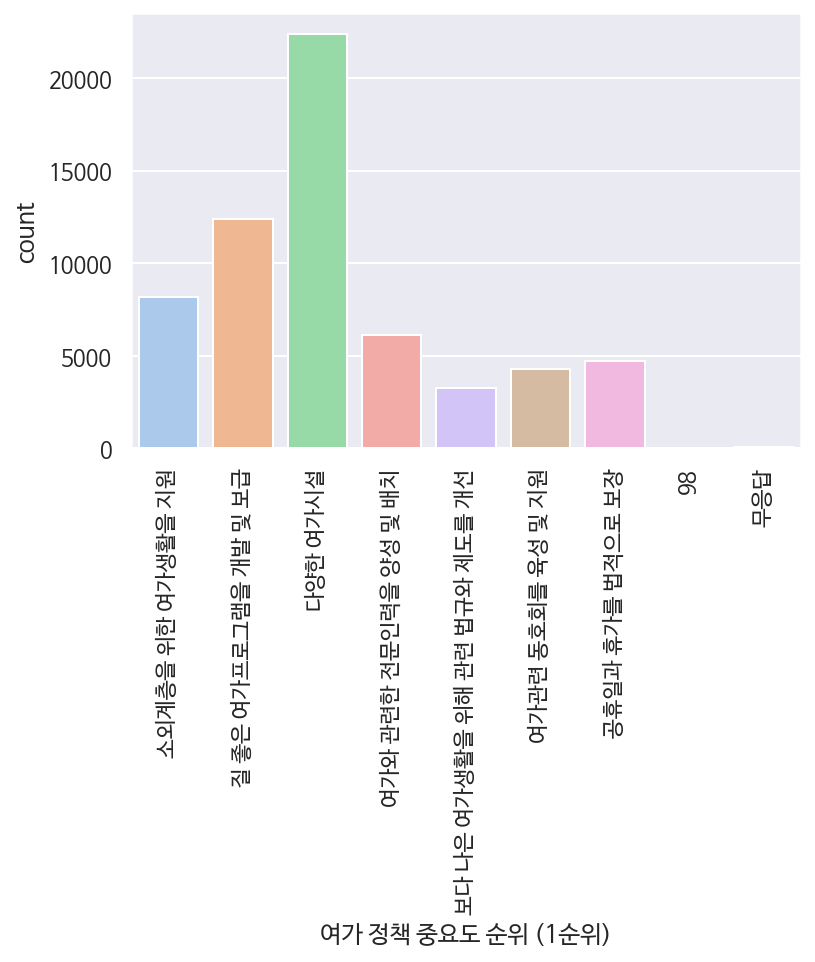

In [100]:
plt.xticks(rotation = 90 )
sns.countplot(x='여가 정책 중요도 순위 (1순위)', data=policy_df, palette='pastel')

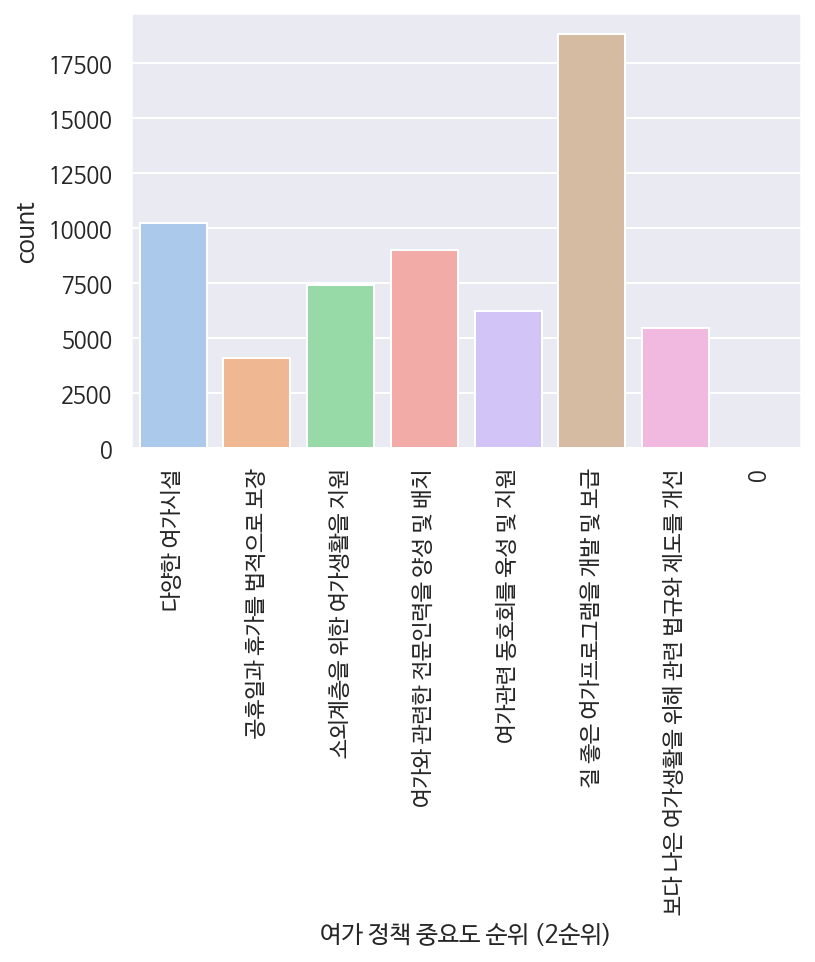

In [101]:
plt.xticks(rotation = 90 )
sns.countplot(x='여가 정책 중요도 순위 (2순위)', data=policy_df, palette='pastel')

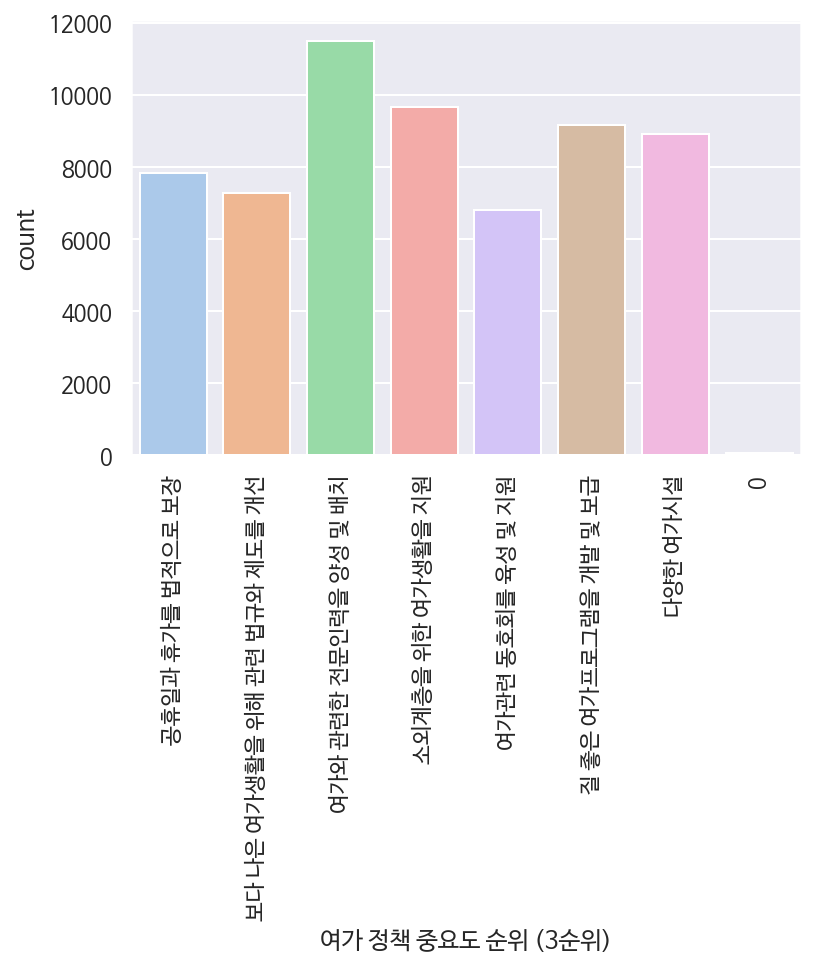

In [102]:
plt.xticks(rotation = 90 )
sns.countplot(x='여가 정책 중요도 순위 (3순위)', data=policy_df, palette='pastel')

In [ ]:
Data.Frame열이름.value_counts()

In [125]:
df2 = pd.DataFrame({'종류':[]})
for i in :policy_df
  if i in diction :
    df3 = pd.DataFrame({'종류':['여가시설의 다양성']})
    df2 = df2.append(df3)
  elif i in diction2 :
    df3 = pd.DataFrame({'종류':['질 좋은 여가프로그램 개발 및 보급']})
    df2 = df2.append(df3)
  elif i in diction3 :
    df3 = pd.DataFrame({'종류':['여가 관련 전문인력 양성 및 배치']})
    df2 = df2.append(df3)
  elif i in diction4 :
    df3 = pd.DataFrame({'종류':['소외계층 여가생활 지원']})
    df2 = df2.append(df3)
  elif i in diction5 :
    df3 = pd.DataFrame({'종류':['여가관련 법규와 제도 개선']})
    df2 = df2.append(df3)
  elif i in diction6 :
    df3 = pd.DataFrame({'종류':['공휴일과 휴가를 법적 보장']})
    df2 = df2.append(df3)

SyntaxError: ignored

## 전반적인 여가생활 만족도

In [103]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = "‪C:/Users/37711/Downloads/nanum-gothic/NanumGothic.otf"
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [104]:
policy_df2=df[['year','Q30','Q30_1','Q30_1_T','Q31','Q32']]
policy_df2

,year,Q30,Q30_1,Q30_1_T,Q31,Q32
0,2014,2,시간이 부족하여,...,NaN,NaN
1,2014,4 보통,NaN,...,NaN,NaN
2,2014,2,경제적 부담 때문에,...,NaN,NaN
3,2014,6,NaN,...,NaN,NaN
4,2014,4 보통,NaN,...,NaN,NaN
...,...,...,...,...,...,...
61326,2021,5,NaN,...,5,6
61327,2021,6,NaN,...,6,6
61328,2021,4 보통,시간이 부족하여,...,7 매우 그렇다,7 매우 그렇다
61329,2021,3,기타,코로나 때문에 ...,6,6


In [105]:
policy_df2.rename(columns={'Q30':'전반적 여가생활 만족도','Q30_1': '여가생활 불만족 이유' , 'Q31' : '여가인식- 여가활동이 삶의 필수적인 요건이다','Q32':'여가인식 - 여가활동이 삶의 긍정적 영향을 끼치는 지 여부'})

,year,전반적 여가생활 만족도,여가생활 불만족 이유,Q30_1_T,여가인식- 여가활동이 삶의 필수적인 요건이다,여가인식 - 여가활동이 삶의 긍정적 영향을 끼치는 지 여부
0,2014,2,시간이 부족하여,...,NaN,NaN
1,2014,4 보통,NaN,...,NaN,NaN
2,2014,2,경제적 부담 때문에,...,NaN,NaN
3,2014,6,NaN,...,NaN,NaN
4,2014,4 보통,NaN,...,NaN,NaN
...,...,...,...,...,...,...
61326,2021,5,NaN,...,5,6
61327,2021,6,NaN,...,6,6
61328,2021,4 보통,시간이 부족하여,...,7 매우 그렇다,7 매우 그렇다
61329,2021,3,기타,코로나 때문에 ...,6,6


IndexError: ignored

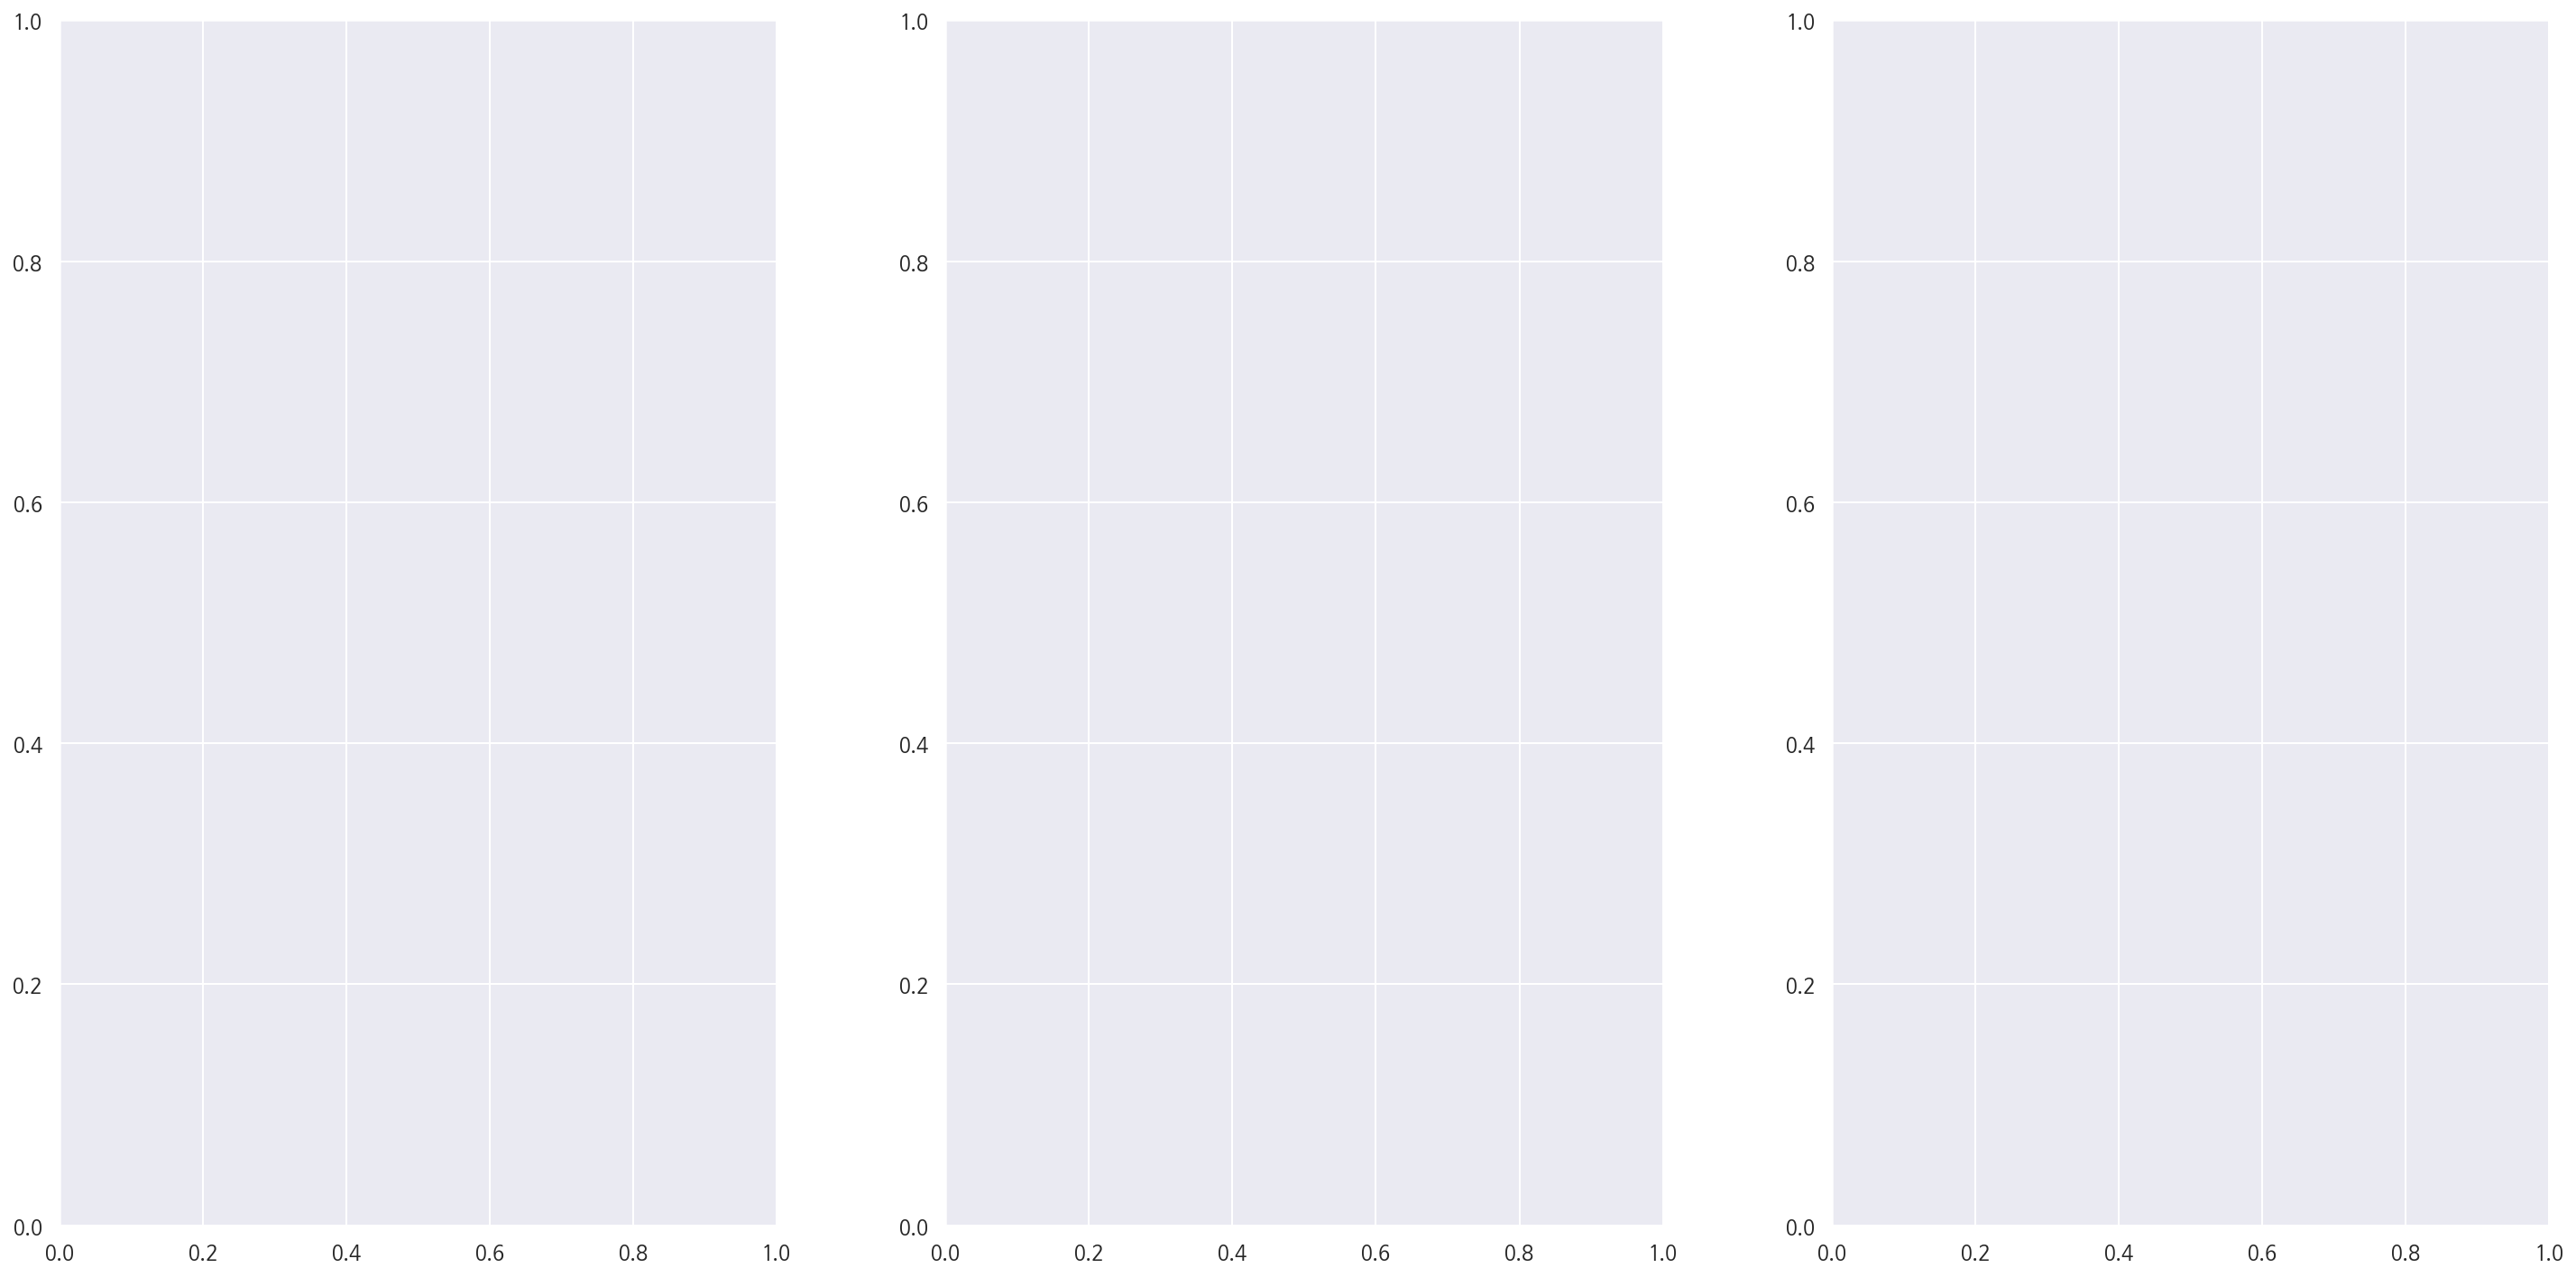

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.countplot(x='여가 정책 중요도 순위 (1순위)', data=policy_df,ax=ax[0,0], palette='pastel')
sns.countplot(x='여가 정책 중요도 순위 (2순위)', data=policy_df,ax=ax[0,1], palette='pastel')
sns.countplot(x='여가 정책 중요도 순위 (3순위)', data=policy_df,ax=ax[0,2], palette='pastel')
plt.show()

In [ ]:
plt.plot(year, suicides_nz)
plt.legend()
sns.countplot(x='다양한 여가시설', data=policy_df, palette='pastel')

plt.plot(days, money_spent)

plt.plot(days, money_spent_2)

plt.show()

In [ ]:
policy_df2.plot()
plt.ylim([1,9])